In [18]:
import optuna
import numpy as np
import os, pdb

LOG_DIR = '/raid6/ebihara/tensorflow/logs/TANDEMAUS/dblogs/'

study_name = 'offset2.0_AUC_optimMacRec_tuning'
study_name = 'offset2.0_AUC_optimMABS_tuning'
study_name = 'offset2.0_AUC_optimAUSAT_tuning'
study_name = 'offset1.0_AUC_optimMacRec_tuning'
study_name = 'offset1.0_AUC_optimMABS_tuning'
study_name = 'offset1.0_AUC_optimAUSAT_tuning'
study_name = 'offset2.0_TANDEMAUS_optMacRec_tuning'
# study_name = 'offset2.0_TANDEMAUS_optMABS_tuning'

# study_name = 'tmpTANDEMAUS_tuning'
# study_name = 'tmpDREAUC_tuning'

storage_name = 'sqlite:///{}.db'.format(study_name)




In [19]:
# for upgrading .db file
# error: RuntimeError: The runtime optuna version 3.0.0 is no longer compatible with the table schema (set up by optuna 2.10.1). Please execute `$ optuna storage upgrade --storage $STORAGE_URL` for upgrading the storage.

#  !cp /raid6/ebihara/tensorflow/logs/UCF2class/dblogs/Tfmr_UCF2class_tuning.db /raid6/ebihara/tensorflow/logs/UCF2class/dblogs/Tfmr_UCF2class_tuning_orig.db
# !optuna storage upgrade --storage /raid6/ebihara/tensorflow/logs/UCF2class/dblogs/Tfmr_UCF2class_tuning.db
# !pip install optuna==2.10.1

In [20]:
if not os.path.exists(LOG_DIR + study_name + '.db'):
    raise ValueError('No .db file exists...double check yr paths!')

In [21]:
currdir = os.getcwd()
os.chdir(LOG_DIR)

study = optuna.create_study(study_name=study_name,
                            storage=storage_name,
                            load_if_exists=True)
df = study.trials_dataframe()
print('df', df)
print('best_value:', study.best_value)
print('best_params:', study.best_params)
print('best_trial:', study.best_trial)
#    print('all trials:', study.trials)
print('')

valuepos = 1
trials = study.trials
values = []
for s in trials:
    s = str(s).split()
    if not 'value' in s[valuepos]:
        raise ValueError('unexpected string structure!')
    if 'None' in s[valuepos]:
        values.append(1.0)
    else:
        # pdb.set_trace()
        #values.append(float(s[valuepos][6:-1]))
        values.append(float(s[valuepos][8:-2]))

list1, list2 = zip(*sorted(zip(values, list(trials)), reverse=True))
print('\ntotal: {}trias'.format(len(list2)))
print('above: best trials, the later the better..')
for i in range(len(list2)):
    print(list2[i])


[I 2023-01-03 02:06:35,020] Using an existing study with name 'offset2.0_TANDEMAUS_optMacRec_tuning' instead of creating a new one.


df    number     value             datetime_start          datetime_complete  \
0       0  0.496124 2023-01-03 00:39:26.358248 2023-01-03 01:01:13.286816   
1       1  0.499962 2023-01-03 01:01:13.360978 2023-01-03 01:20:23.022069   
2       2       NaN 2023-01-03 01:20:23.094306 2023-01-03 01:38:52.621888   

                duration params_AUCloss_version params_activation  \
0 0 days 00:21:46.928568                      D           B2Bsqrt   
1 0 days 00:19:09.661091                      C           sigmoid   
2 0 days 00:18:29.527582                      A              tanh   

   params_alpha params_fc_activation  params_flag_mult  ...  \
0           1.0                 relu              True  ...   
1           1.0              B2Bsqrt             False  ...   
2           1.0              B2Bsqrt             False  ...   

   params_learning_rate  params_num_thresh  params_optimizer  \
0                0.0001               2000              adam   
1                0.0001       

In [17]:
study.best_trial

ValueError: Record does not exist.

# Manually extract the tuning results

In [36]:
targdir = '/raid6/ebihara/tensorflow/logs/UCF2class/ckptlogs/Tfmr_UCF2class_tuning/'

best = 0.0
targtrial = ''
for trial in os.listdir(targdir):
    for result in os.listdir(targdir + trial):
        if 'macrec' and 'index' in result:
            value = float(result[result.find('macrec') + len('macrec') : result.find('-')])
            if value > best:
                best = value
                targtrial = trial
            elif value == best:
                raise ValueError('Exactly the same result!')

print(targtrial, best)

Tfmr_UCF2class_20220909_210045464 0.99396


In [11]:
1-0.0014421445372780894

0.9985578554627219

/tmp/ipykernel_921/1089670179.py:5: RuntimeWarning: invalid value encountered in log
  plt.plot(x, np.log(x), label='log')
/tmp/ipykernel_921/1089670179.py:6: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x, np.sqrt(x), label='sqrt')


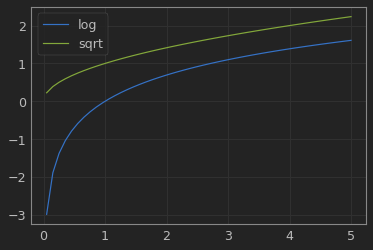

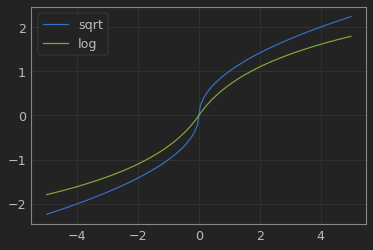

In [42]:
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
f = np.sign(x)*np.sqrt(1 + np.abs(x)- 1) 
g = np.sign(x)*np.log(1 + np.abs(x))
plt.plot(x, np.log(x), label='log')
plt.plot(x, np.sqrt(x), label='sqrt')
plt.legend()
plt.show()

plt.plot(x, f, label='sqrt')
plt.plot(x, g, label='log')
plt.legend()
plt.show()